Understand the Dataset & cleanup (if required).
Build classification models to predict whether the cancer type is Malignant or Benign.
 Also fine-tune the hyperparameters & compare the evaluation metrics of various classification algorithms.


In [54]:
import pandas as pd
import numpy as np


#sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer

import xgboost as xgb

#for data splitting
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df = pd.read_csv("breast-cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [56]:
df.shape

(569, 32)

In [57]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [58]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


Now let's summarize the info from the data.

In [59]:
def check(df):
    lst=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        lst.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(lst)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check

In [60]:
check(df)

,column,dtypes,nunique,sum_null
0,id,int64,569,0
1,diagnosis,object,2,0
2,radius_mean,float64,456,0
3,texture_mean,float64,479,0
4,perimeter_mean,float64,522,0
5,area_mean,float64,539,0
6,smoothness_mean,float64,474,0
7,compactness_mean,float64,537,0
8,concavity_mean,float64,537,0
9,concave points_mean,float64,542,0


As we can see, we don't have any missing values, and only diagnosis column has a object data type...

we need to map that column, but first we need checkout how many unique values we do have:

Now let's visulize the data

AttributeError: module 'seaborn' has no attribute 'legend'

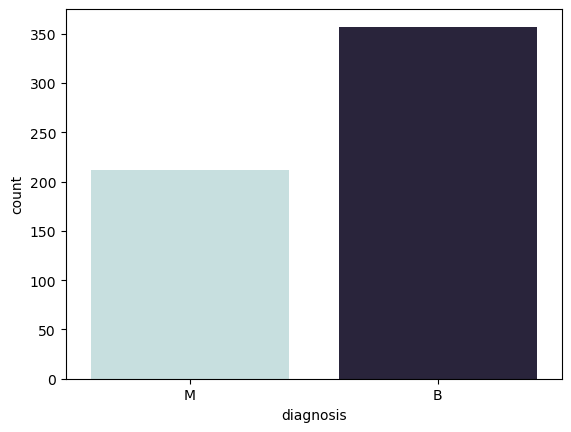

In [61]:
sns.countplot(x = df['diagnosis'], palette ="ch:start=.2,rot=-.3")
sns.legend(labels=['Benign', 'Malignant'])

In [ ]:
print(df['diagnosis'].unique())

So there are only two:
    'M' - Malignant
    'B' - Benign

In [ ]:
cancer_map = {'B' : 0, 'M' : 1}
df['diagnosis'] = df['diagnosis'].map(cancer_map)

#also lets drop the id column
#commented to avoid error rise
#df = df.drop('id', axis=1)

In [ ]:
#checking out the result
df.head()

At this stage, we checked the data. now we need to plot some graphs to get more sense of it

First I will do random forest. 

In [ ]:
df_temp_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_temp_train, test_size=0.25, random_state=42)

print(df_train.shape[0], df_test.shape[0], df_val.shape[0])

In [ ]:
y_train = df_train['diagnosis'].values
y_val = df_val['diagnosis'].values
y_test = df_test['diagnosis'].values

In [ ]:
X_train = df_train.drop('diagnosis', axis=1).copy()
X_val = df_val.drop('diagnosis', axis=1).copy()
X_test = df_test.drop('diagnosis', axis=1).copy()

In [ ]:
rfc = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=2,
    min_samples_leaf=5,
    n_jobs=-1
    )
rfc.fit(X_train, y_train)

In [ ]:
y_score = rfc.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_score)

Let's tune n_estimators (number of trees)

In [95]:
aucs = []

for i in range(1, 5, 1):
    rfc = RandomForestClassifier(
        n_estimators=100,
        n_jobs=-1
        )
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    aucs.append(auc)

(0.8, 1.0)

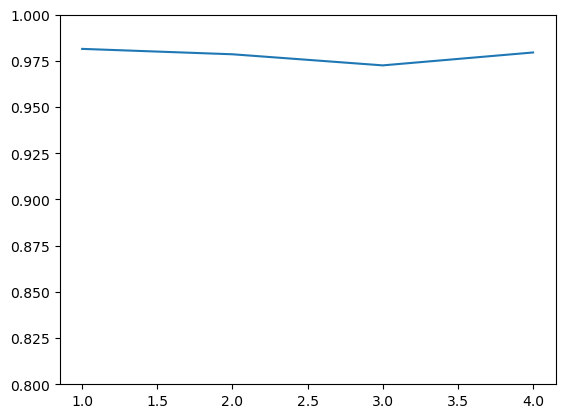

In [98]:
plt.plot(range(1, 5, 1), aucs)
plt.ylim(0.8, 1)

I have tried various n_estimators, it can be seen it doesn't give you much difference. 

let's try to also tune another parameters.

n_estimators I will put n_estimators = 5

(0.7, 1.0)

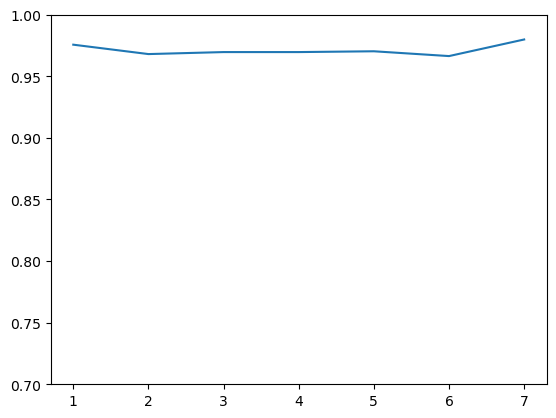

In [108]:
max_depth_start = 1
max_depth_end = 8
max_deth_step = 1

aucs = []

for j in range(max_depth_start, max_depth_end, max_deth_step):
    rfc = RandomForestClassifier(
        n_estimators=5,
        max_depth = j,
        n_jobs=-1
        )
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    aucs.append(auc)

plt.plot(range(max_depth_start, max_depth_end, max_deth_step), aucs)
plt.ylim(0.7, 1)

In [97]:
#dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=df.feature_names_)
